In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

A/B Test Results:
T-statistic: 26.03871482634037
P-value: 1.7768818558378816e-114
Mean difference: 49.128801522842906


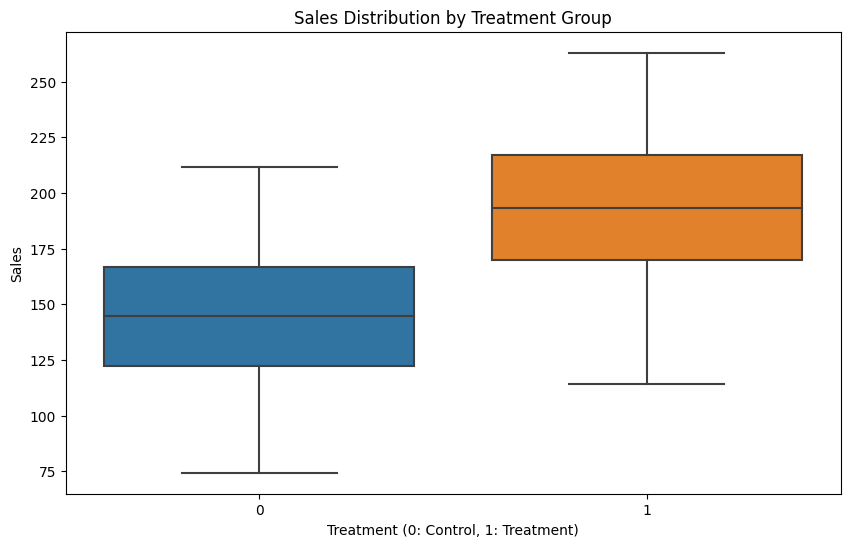


Linear Regression Results:
ad_spend: 0.009934433554209247
seasonality: 9.810708003867632
competitor_activity: -18.61880397770407
treatment: 50.38940113144511
Intercept: 99.05310069135436


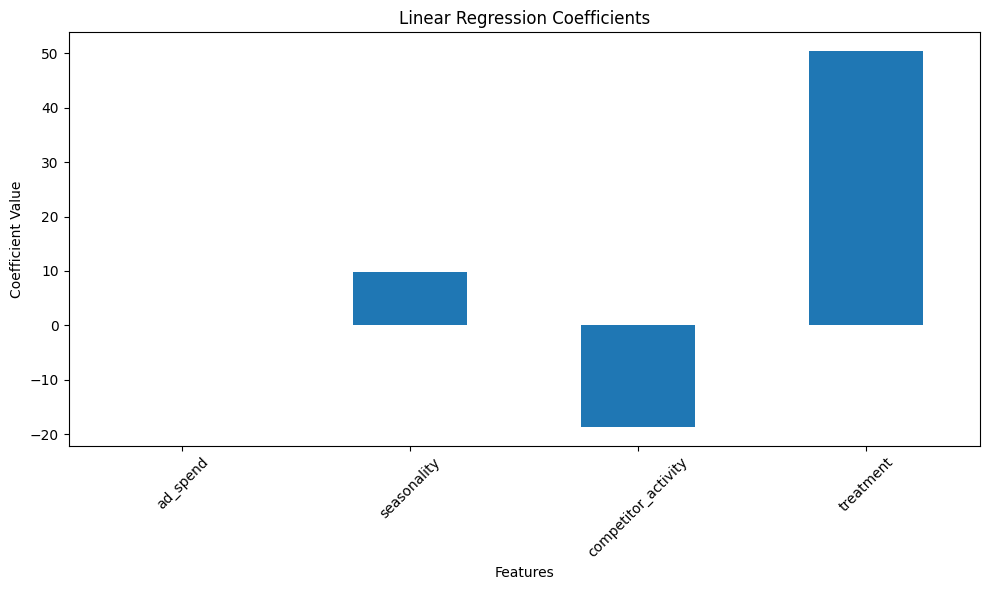


Propensity Score Matching Results:
Estimated treatment effect: 49.37535653463155


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

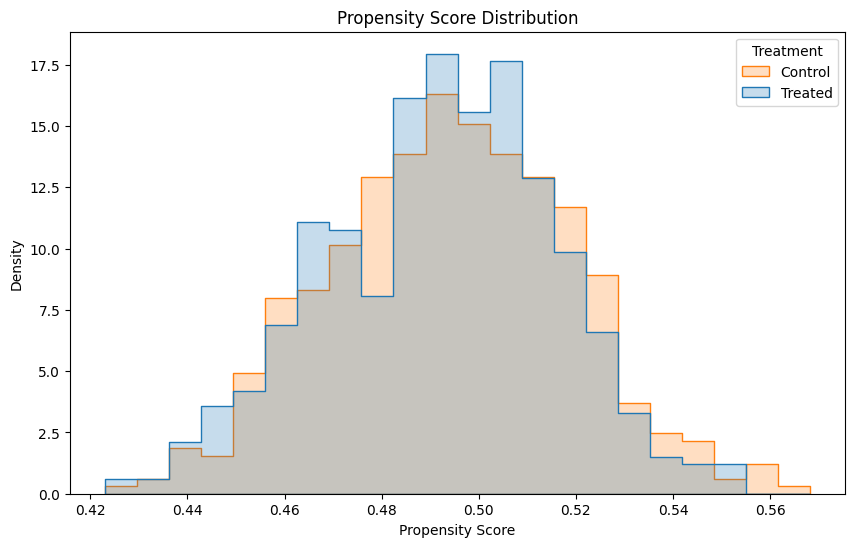


Difference-in-Differences Results:
treatment: 48.20480474900361
time: -1.2375890918565684
interaction: 1.8442814849376457
Intercept: 145.85345085876125


/tmp/ipykernel_17/1157017999.py:141: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=data, x='time', y='sales', hue='treatment', err_style='band', ci=95)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence 

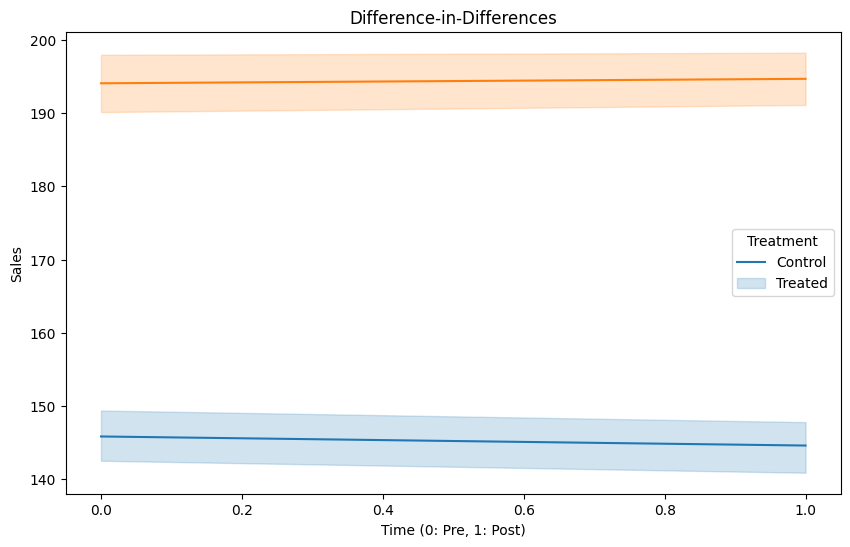

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Generation
np.random.seed(42)
n_samples = 1000

# Generate features
ad_spend = np.random.uniform(1000, 10000, n_samples)
seasonality = np.random.normal(0, 1, n_samples)
competitor_activity = np.random.uniform(0, 1, n_samples)

# Generate treatment (marketing campaign)
treatment = np.random.binomial(1, 0.5, n_samples)

# Generate outcome (sales)
sales = 100 + 0.01 * ad_spend + 10 * seasonality - 20 * competitor_activity + 50 * treatment + np.random.normal(0, 10, n_samples)

# Create DataFrame
data = pd.DataFrame({
    'ad_spend': ad_spend,
    'seasonality': seasonality,
    'competitor_activity': competitor_activity,
    'treatment': treatment,
    'sales': sales
})

# 2. Simple A/B Testing
def ab_test(data):
    treatment_sales = data[data['treatment'] == 1]['sales']
    control_sales = data[data['treatment'] == 0]['sales']
    
    t_stat, p_value = ttest_ind(treatment_sales, control_sales)
    
    print("A/B Test Results:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print(f"Mean difference: {treatment_sales.mean() - control_sales.mean()}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='treatment', y='sales', data=data)
    plt.title('Sales Distribution by Treatment Group')
    plt.xlabel('Treatment (0: Control, 1: Treatment)')
    plt.ylabel('Sales')
    plt.show()

ab_test(data)

# 3. Linear Regression for Causal Inference
def linear_regression_causal_inference(data):
    X = data[['ad_spend', 'seasonality', 'competitor_activity', 'treatment']]
    y = data['sales']
    
    model = LinearRegression()
    model.fit(X, y)
    
    print("\nLinear Regression Results:")
    for feature, coef in zip(X.columns, model.coef_):
        print(f"{feature}: {coef}")
    print(f"Intercept: {model.intercept_}")

    # Visualization
    plt.figure(figsize=(10, 6))
    coefficients = pd.Series(model.coef_, index=X.columns)
    coefficients.plot(kind='bar')
    plt.title('Linear Regression Coefficients')
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

linear_regression_causal_inference(data)

# 4. Propensity Score Matching
def propensity_score_matching(data):
    # Calculate propensity scores
    X = data[['ad_spend', 'seasonality', 'competitor_activity']]
    y = data['treatment']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    ps_model = LogisticRegression(random_state=42)
    ps_model.fit(X_scaled, y)
    
    data['propensity_score'] = ps_model.predict_proba(X_scaled)[:, 1]
    
    # Match treatment and control groups
    treated = data[data['treatment'] == 1]
    control = data[data['treatment'] == 0]
    
    matched_pairs = []
    for _, treated_row in treated.iterrows():
        best_match = control.iloc[(control['propensity_score'] - treated_row['propensity_score']).abs().argsort()[0]]
        matched_pairs.append((treated_row, best_match))
    
    # Calculate treatment effect
    treatment_effect = np.mean([pair[0]['sales'] - pair[1]['sales'] for pair in matched_pairs])
    
    print("\nPropensity Score Matching Results:")
    print(f"Estimated treatment effect: {treatment_effect}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='propensity_score', hue='treatment', element='step', stat='density', common_norm=False)
    plt.title('Propensity Score Distribution')
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    plt.legend(title='Treatment', labels=['Control', 'Treated'])
    plt.show()

propensity_score_matching(data)

# 5. Difference-in-Differences (DiD)
def difference_in_differences(data):
    # Assume we have pre and post-treatment periods
    data['time'] = np.random.binomial(1, 0.5, len(data))  # 0 for pre, 1 for post
    
    # Calculate DiD estimator
    did_model = LinearRegression()
    X = pd.get_dummies(data[['treatment', 'time']], drop_first=True)
    X['interaction'] = data['treatment'] * data['time']
    y = data['sales']
    
    did_model.fit(X, y)
    
    print("\nDifference-in-Differences Results:")
    for feature, coef in zip(X.columns, did_model.coef_):
        print(f"{feature}: {coef}")
    print(f"Intercept: {did_model.intercept_}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='time', y='sales', hue='treatment', err_style='band', ci=95)
    plt.title('Difference-in-Differences')
    plt.xlabel('Time (0: Pre, 1: Post)')
    plt.ylabel('Sales')
    plt.legend(title='Treatment', labels=['Control', 'Treated'])
    plt.show()

difference_in_differences(data)